In [ ]:
import Logistic_Regression_Environments as Logistic_regression_env
import copy
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import SAC, PPO, DDPG
from Logistic_Regression_Environments import LogisticRegressionEnv, SmallNN, JupyterNotebookPlotCallback, testing, generate_dataset, testing_adam
import numpy as np
import torch.optim as optim
from gym import spaces
import matplotlib.pyplot as plt
from stable_baselines3 import SAC, PPO, DDPG
import matplotlib.pyplot as plt
import copy
import torch.optim as optim
import torch
import torch.nn as nn
import torch.optim as optim

/Users/I761836/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
training_set = generate_dataset(5)
train_env = LogisticRegressionEnv(training_set)
testing_set = generate_dataset(20)
test_env = LogisticRegressionEnv(testing_set)

In [4]:
sac_agent = SAC("MlpPolicy", train_env, verbose=1, learning_rate=1e-4)
ddpg_agent = DDPG.load("DDPG_Agent_Logistic_Regression")
ppo_agent = PPO.load("PPO_Agent_Logistic_Regression")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/Users/I761836/Library/Python/3.9/lib/python/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [6]:
ddpg_agent.learning_rate

0.0001

In [ ]:
sac_agent.set_env(train_env)
ddpg_agent.set_env(train_env)
ppo_agent.set_env(train_env)

/Users/I761836/Library/Python/3.9/lib/python/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


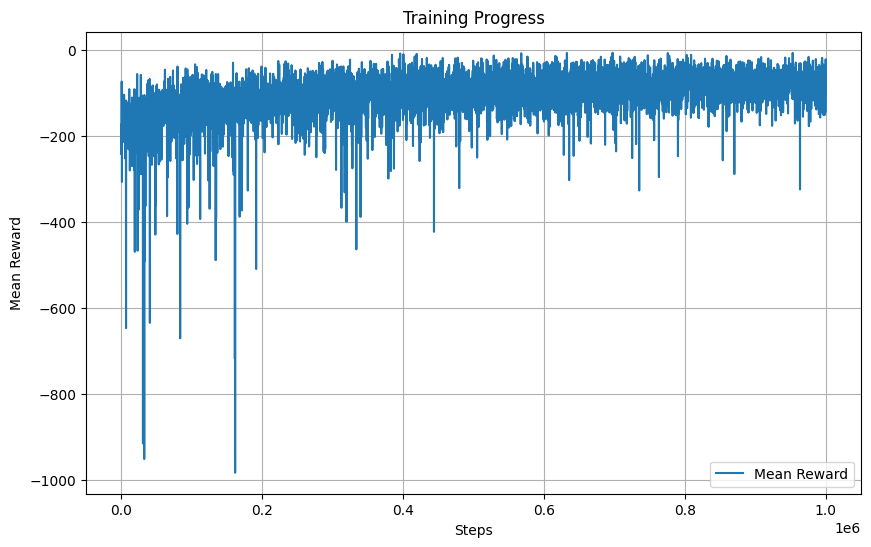

In [24]:
callback_sac = JupyterNotebookPlotCallback()
sac_agent.ent_coef = 0.025
sac_agent.learn(total_timesteps=1000000, callback = callback_sac)

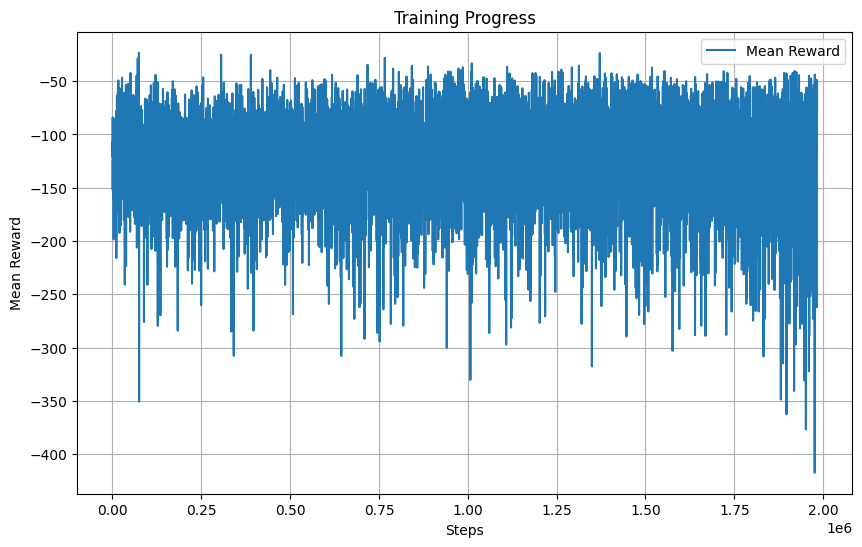

In [ ]:
callback_ppo = JupyterNotebookPlotCallback()
ppo_agent.learn(total_timesteps=2e6, callback = callback_ppo)

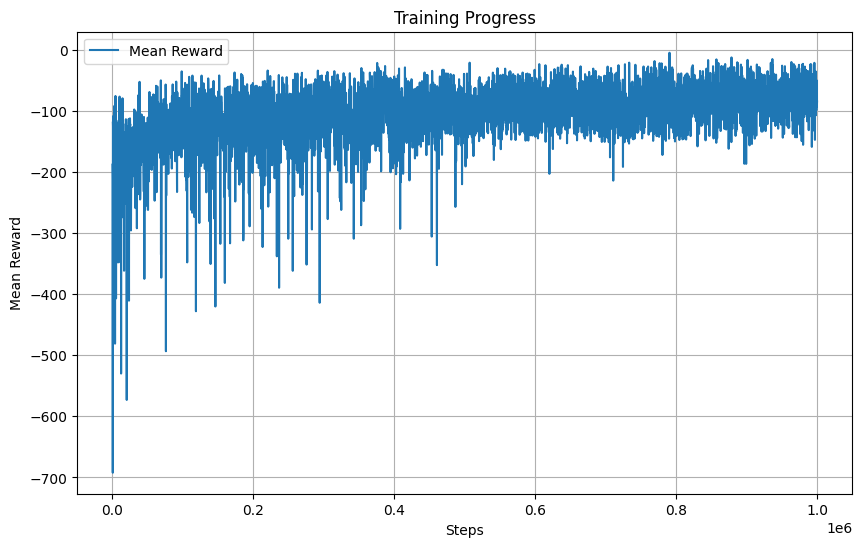

In [26]:
callback_ddpg = JupyterNotebookPlotCallback()
ddpg_agent.learn(total_timesteps = 1e6, callback = callback_ddpg)

In [ ]:
sac_agent.save("SAC_Agent_Logistic_Regression1")
ddpg_agent.save("DDPG_Agent_Logistic_Regression1")
ppo_agent.save("PPO_Agent_Logistic_Regression1")

In [ ]:
base_model = SmallNN()
sac_agent.set_env(test_env)
ddpg_agent.set_env(test_env)
ppo_agent.set_env(test_env)

sac_loss, sac_acc = testing(testing_set, sac_agent, copy.deepcopy(base_model))
ddpg_loss, ddpg_acc = testing(testing_set, ddpg_agent, copy.deepcopy(base_model))
ppo_loss, ppo_acc = testing(testing_set, ppo_agent, copy.deepcopy(base_model))
adam_loss, adam_acc = testing_adam(testing_set, base_model)

/Users/I761836/Library/Python/3.9/lib/python/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
